In [1]:
# Importing models 
import pandas as pd
import os 
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Soil texture was decided as Silt Loam based on soil texture file
fc = 0.42 # VWC at FC
pwp = 0.15# VWC at PWP
mad = (fc+pwp)*0.4 # Maximum allowable depletion, 60% of available water (FC - PWP)

d3 = 90 # Profile depth

In [4]:

    
# Plot a graph to see variations in soil  moisture content and available water
excel_file = r"C:\\Priyanka\\hackthone-kansas\\Water-squad-dash\\dataset\\Sentek_Moisture_in_cm_All_Sheets.xlsx"
sheets = pd.read_excel(excel_file, sheet_name= None)
#df.head()

# Process each sheet
for sheet_name, df in sheets.items():
    # Add three columns for FC (field caapcity), PWP (permenant wiliting point), and available moisture in mm
    df["FC"] = fc*d3*10 # profile depth is equal to d3 = 90 cm
    df["PWP"] = pwp*d3*10
    df["MAD"] = ((df["FC"] - df["PWP"])*0.5) + df["PWP"]
    df["AW"] = df["soil_moisture_mm"] - df["PWP"]
    
with pd.ExcelWriter(r"C:\\Priyanka\\hackthone-kansas\\Water-squad-dash\\dataset\\Sentek_Moisture_in_cm_All_Sheets_aw.xlsx") as writer:
    for sheet_name, df in sheets.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

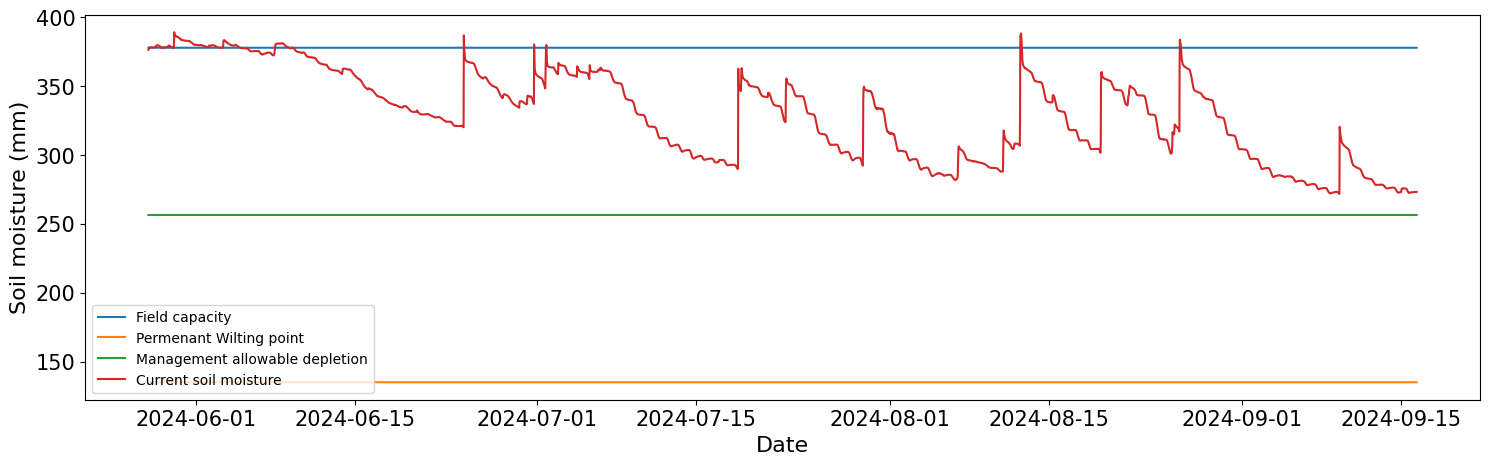

In [6]:
team_3 = pd.read_excel(r"C:\\Priyanka\\hackthone-kansas\\Water-squad-dash\\dataset\\Sentek_Moisture_in_cm_All_Sheets_aw.xlsx", sheet_name= "Team #3 Data")
#team_9 = pd.read_excel(r"C:\Users\nishadini\Downloads\Sentek_Moisture_in_cm_All_Sheets_aw.xlsx", sheet_name= "Team #9 Data")
#team_10 = pd.read_excel(r"C:\Users\nishadini\Downloads\Sentek_Moisture_in_cm_All_Sheets_aw.xlsx", sheet_name= "Team #10 Data")
#team_16 = pd.read_excel(r"C:\Users\nishadini\Downloads\Sentek_Moisture_in_cm_All_Sheets_aw.xlsx", sheet_name= "Team #16 Data")
#team_17 = pd.read_excel(r"C:\Users\nishadini\Downloads\Sentek_Moisture_in_cm_All_Sheets_aw.xlsx", sheet_name= "Team #17 Data")
#team_23 = pd.read_excel(r"C:\Users\nishadini\Downloads\Sentek_Moisture_in_cm_All_Sheets_aw.xlsx", sheet_name= "Team #23 Data")
#team_29 = pd.read_excel(r"C:\Users\nishadini\Downloads\Sentek_Moisture_in_cm_All_Sheets_aw.xlsx", sheet_name= "Team #29 Data")
#team_30 = pd.read_excel(r"C:\Users\nishadini\Downloads\Sentek_Moisture_in_cm_All_Sheets_aw.xlsx", sheet_name= "Team #30 Data")
#team_32 = pd.read_excel(r"C:\Users\nishadini\Downloads\Sentek_Moisture_in_cm_All_Sheets_aw.xlsx", sheet_name= "Team #32 Data")
#team_33 = pd.read_excel(r"C:\Users\nishadini\Downloads\Sentek_Moisture_in_cm_All_Sheets_aw.xlsx", sheet_name= "Team #32 Data")
#team_34 = pd.read_excel(r"C:\Users\nishadini\Downloads\Sentek_Moisture_in_cm_All_Sheets_aw.xlsx", sheet_name= "Team #34 Data")

# Plot the graph for soil moisture 
plt.figure(figsize=(18,5))
plt.plot (team_3["Timestamp"],team_3["FC"], label = "Field capacity")
plt.plot (team_3["Timestamp"],team_3["PWP"], label = "Permenant Wilting point")
plt.plot (team_3["Timestamp"],team_3["MAD"], label = "Management allowable depletion")
plt.plot (team_3["Timestamp"],team_3["soil_moisture_mm"], label = "Current soil moisture")

plt.xlabel("Date", fontsize = 16)
plt.ylabel("Soil moisture (mm)", fontsize = 16)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.legend()
plt.show()


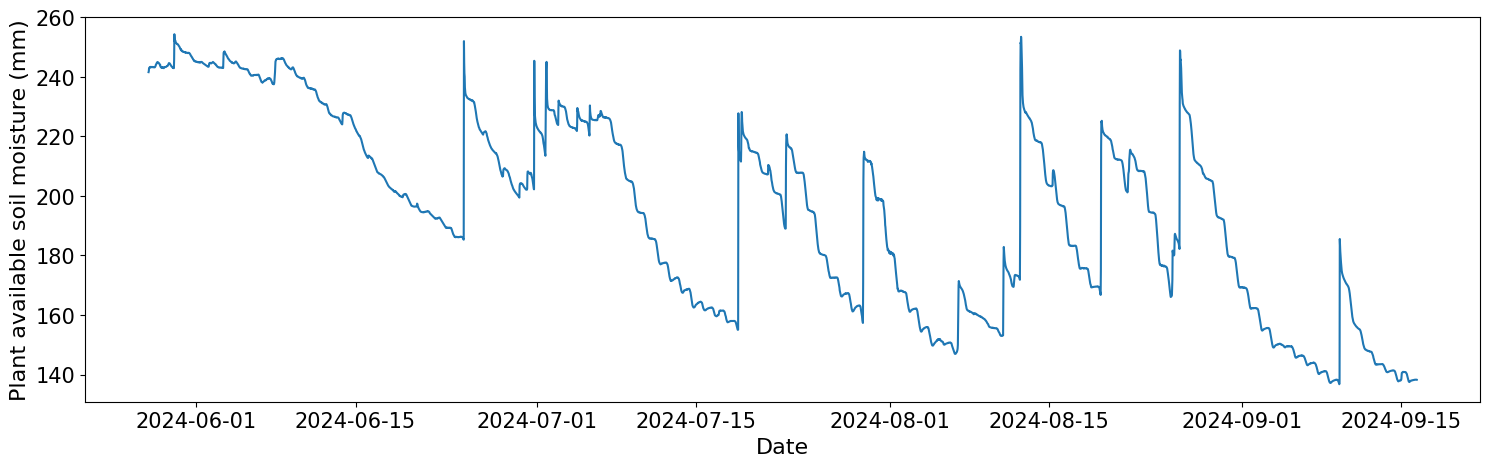

In [7]:
# Plot the graph for soil moisture 
plt.figure(figsize=(18,5))
plt.plot (team_3["Timestamp"],team_3["AW"], label = "Plant available water")
plt.xlabel("Date", fontsize = 16)
plt.ylabel("Plant available soil moisture (mm)", fontsize = 16)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
#plt.legend()
plt.show()
